<a href="https://colab.research.google.com/github/emmarant/honeyguides/blob/main/honeyguides_signal_amplitude_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Get Data

Download from GDrive the audio data as a tar file (named recordings.tgz here)...

In [1]:
!gdown 1UxKrIt_NlstgXnIbAcSr1vwHlVMPfRF2

Downloading...
From: https://drive.google.com/uc?id=1UxKrIt_NlstgXnIbAcSr1vwHlVMPfRF2
To: /content/recordings.tgz
100% 465M/465M [00:08<00:00, 54.3MB/s]


... untar file

In [ ]:
!tar -xzvf /content/recordings.tgz

also download xls file with metadata

In [3]:
!gdown 1UNh9fROnTopHQIbZIEcTZW2FUJQWLhde

Downloading...
From: https://drive.google.com/uc?id=1UNh9fROnTopHQIbZIEcTZW2FUJQWLhde
To: /content/recordings_emmanouela.xlsx
100% 26.7k/26.7k [00:00<00:00, 54.8MB/s]


### Set up environment and functions

In [ ]:
!git clone https://github.com/MuSAELab/amplitude-modulation-analysis-module.git

In [ ]:
!pip install am_analysis

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.signal import hilbert
import pandas as pd

import librosa
import librosa.display
import IPython.display as ipd

import os

from am_analysis import am_analysis as ama


Let's install some missing packages and import some useful stuff first

### Dataframes

In this section an xls file containing the names and characteristics of audio files is used to create pandas dataframes, which will hold the same information, but allow python to easily access and handle these files. (note: the dataframes created, only contain the names of the audio files, not the contents of the files. Audio files are instead read in demand, using the filenames stored in the dataframes).

- _2.1_ The xls file is initially read and its contents stored in one main dataframe (named **df_all**)

- _2.2_ Original file names often contain spaces. This part renames all audio files by replacing spaces with underscores. This part needs to be run only once for each new dataset.

- _2.3_ The filenames stored in the  main dataframe are also changed to replace spaces with underscores.

- _2.4_ Find duration (in seconds) of each audio file contained in the main dataframe. Create an extra column with this information.

- _2.5_ Check out the contents of the dataframes and distribution of data by plotting various informative histograms.

- _2.6_ Create separate dataframes for each 'call type' (e.g. 'host1_brood', 'parasite1_single', 'host1_single', etc). This makes things easier to handle later on.

#### All files in one dataframe

Read xls file with info on all audio files into a database.

In [5]:
pd.set_option("max_rows",
              100)  # pandas dataframes will show by default the first 100 rows

In [6]:
# the root directory of the all audio recordings
data_root_dir = '/content/recordings'

In [7]:
# location of xls file
xls_file = '/content/recordings_emmanouela.xlsx'

# read xls in pandas dataframe
df_all = pd.read_excel(xls_file)

# replace NaN values with 'unknown'
df_all['chick stage'].fillna('unknown', inplace=True)

# take a look at header and 10 first entries of dataframe
df_all.head(10)

file_name                species  individuals  \
0         LT07 two barbets 17102009  Black-collared Barbet            2   
1           LT12 4 barbets 31202009  Black-collared Barbet            4   
2        LT38 four barbets 15112010  Black-collared Barbet            4   
3                       111113_0028  Black-collared Barbet            1   
4    LT35_barbethatchling_05112011a  Black-collared Barbet            1   
5    LT35_barbethatchling_05112011b  Black-collared Barbet            1   
6    LT43_barbethatchlingA_11112011  Black-collared Barbet            1   
7   LT43_barbethatchlingB_11112011a  Black-collared Barbet            1   
8   LT43_barbethatchlingB_11112011b  Black-collared Barbet            1   
9  LT15 honeyguide begging 28102009      Lesser Honeyguide            1   

  chick stage              type  
0     stage 4       host1_brood  
1     unknown       host1_brood  
2     stage 4       host1_brood  
3     stage 1      host1_single  
4     stage 1      host1_single  
5     stage 1      host1_single  
6     stage 1      host1_single  
7     stage 1      host1_single  
8     stage 1      host1_single  
9     stage 4  parasite1_single

#### Remove spaces from names of original audio files

<div class="burk">
**This step only needs to be done once for each set of recording files; and if necessary only**

We will rename the audio files to remove spaces and replace them with underscores. We can then adjust the file name entries accordingly in the dataframe (xls file remains as is)</div><i class="fa fa-lightbulb-o "></i>

In [8]:
for file in df_all['file_name']:
    old_name = os.path.join(
        data_root_dir, df_all.loc[df_all['file_name'] == file, 'type'].item(),
        file + '.wav')
    new_name = os.path.join(
        data_root_dir, df_all.loc[df_all['file_name'] == file, 'type'].item(),
        file.replace(' ', '_') + '.wav')
    if os.path.exists(old_name):
        os.rename(old_name, new_name)
        print(new_name)

/content/recordings/host1_single/111113_0028.wav
/content/recordings/host1_single/LT35_barbethatchling_05112011a.wav
/content/recordings/host1_single/LT35_barbethatchling_05112011b.wav
/content/recordings/host1_single/LT43_barbethatchlingA_11112011.wav
/content/recordings/host1_single/LT43_barbethatchlingB_11112011a.wav
/content/recordings/host1_single/LT43_barbethatchlingB_11112011b.wav
/content/recordings/parasite1_single/111112_0024.wav
/content/recordings/parasite1_single/111114_0030.wav
/content/recordings/parasite1_single/LT25_hghatchling_05112011.wav
/content/recordings/parasite1_single/LT040_hgnestling_06112011.wav
/content/recordings/parasite1_single/LT40_hgnestlinginnest_11112011.wav
/content/recordings/parasite1_single/LT43_hghatchlingA_11112011.wav
/content/recordings/host2_single/111112_0025.wav
/content/recordings/host2_single/111115_0031.wav
/content/recordings/host2_single/DR0000_0001.wav
/content/recordings/host2_single/DR0000_0003.wav
/content/recordings/host2_single/

#### Correct filenames in dataframe

__now lets correct the filename entries in the dataframe so that they also do not have spaces and they correspond to the renamed files__


In [9]:
df_all['file_name'] = df_all['file_name'].str.replace(' ', '_')
df_all.head(10)

file_name                species  individuals  \
0         LT07_two_barbets_17102009  Black-collared Barbet            2   
1           LT12_4_barbets_31202009  Black-collared Barbet            4   
2        LT38_four_barbets_15112010  Black-collared Barbet            4   
3                       111113_0028  Black-collared Barbet            1   
4    LT35_barbethatchling_05112011a  Black-collared Barbet            1   
5    LT35_barbethatchling_05112011b  Black-collared Barbet            1   
6    LT43_barbethatchlingA_11112011  Black-collared Barbet            1   
7   LT43_barbethatchlingB_11112011a  Black-collared Barbet            1   
8   LT43_barbethatchlingB_11112011b  Black-collared Barbet            1   
9  LT15_honeyguide_begging_28102009      Lesser Honeyguide            1   

  chick stage              type  
0     stage 4       host1_brood  
1     unknown       host1_brood  
2     stage 4       host1_brood  
3     stage 1      host1_single  
4     stage 1      host1_single  
5     stage 1      host1_single  
6     stage 1      host1_single  
7     stage 1      host1_single  
8     stage 1      host1_single  
9     stage 4  parasite1_single

#### Find duration of each audio file in main dataframe and  add 'duration' column

In [ ]:
duration = []
for file in df_all['file_name']:
    audio = os.path.join(
        data_root_dir, df_all.loc[df_all['file_name'] == file, 'type'].item(),
        file + '.wav')
    signal, sr = librosa.load(audio)
    duration.append(round(len(signal) / sr, 2))
    print(f'total audio duration of file {file} is : {len(signal)/sr:.2f}s')

df_all = df_all.assign(duration=duration)
df_all

#### create separate  dataframes for each type of calls

In [11]:
for call_type in df_all.type.unique():
    vars()['df_' + call_type] = df_all[df_all['type'] == call_type]
    print('there are {} audio files in the {} category'.format(
        len(vars()['df_' + call_type]), call_type))

there are 3 audio files in the host1_brood category
there are 6 audio files in the host1_single category
there are 11 audio files in the parasite1_single category
there are 10 audio files in the host2_brood category
there are 17 audio files in the host2_single category
there are 37 audio files in the parasite2_single category


### Some common functions

#### for reading  audio files

In [12]:
def load_signal(df, file, t_start=0, t_clip=1, full=False):
    
    """
    FUNCTION: load_signal
        Uses librosa's load method to read one or more audio files. 
    """
        
    call_type = df.loc[df['file_name'] == file, 'type'].item()
    audio = os.path.join(data_root_dir, call_type, file + '.wav')
    stage = df.loc[df['file_name'] == file, 'chick stage'].item()
    signal, sr = librosa.load(audio)
    if full:
        return signal, sr, stage, call_type
    else:
        return signal[int(t_start * sr):int((t_start + t_clip) * sr)], sr, stage, call_type

#### for plotting

In [13]:
def legend_without_duplicate_labels(figure):
    """
    FUNCTION: legend_without_duplicate_labels
        If more that one than lines are overplotted in a figure, the legend will include only unique labels and not multiples of the same one
        !!!   THIS FUNCTION IS COPIED FROM SOMEONE ELSE (need to find and attribute credits)   !!!!
    """
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    figure.legend(by_label.values(), by_label.keys(), loc='upper right')

### Plot Amplitude Envelopes

In [24]:
def amplitude_envelope(signal,frame_size,hop_length):
    amp_env = np.array([max(np.abs(signal[i:i+frame_size])) for i in range(0,len(signal),hop_length)])
    #amp_env = np.array([max(signal[i:i+frame_size]) for i in range(0,len(signal),hop_length)])
    return amp_env

Select only stage 4 parasites

In [15]:
df = df_parasite1_single[df_parasite1_single['chick stage']=='stage 4']

#### With homemade a.e. implementation

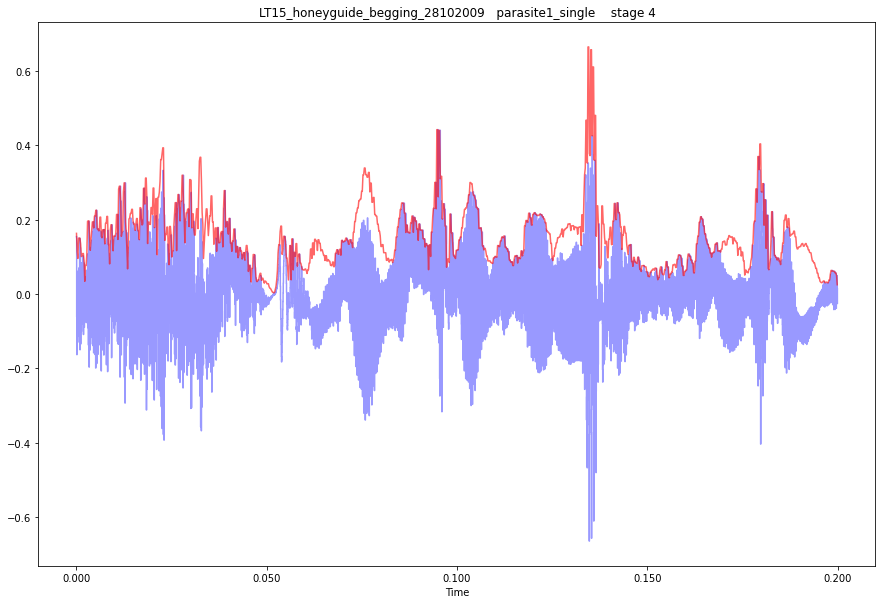

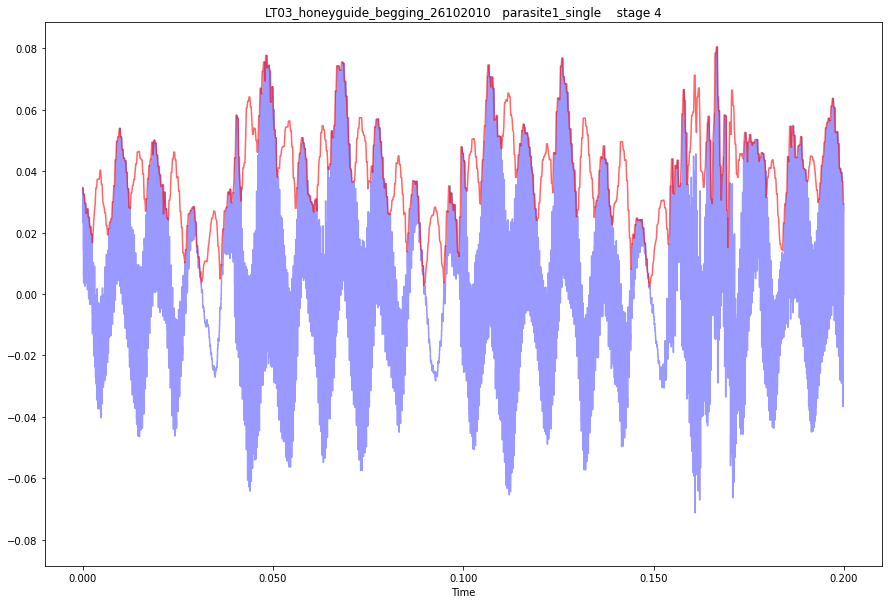

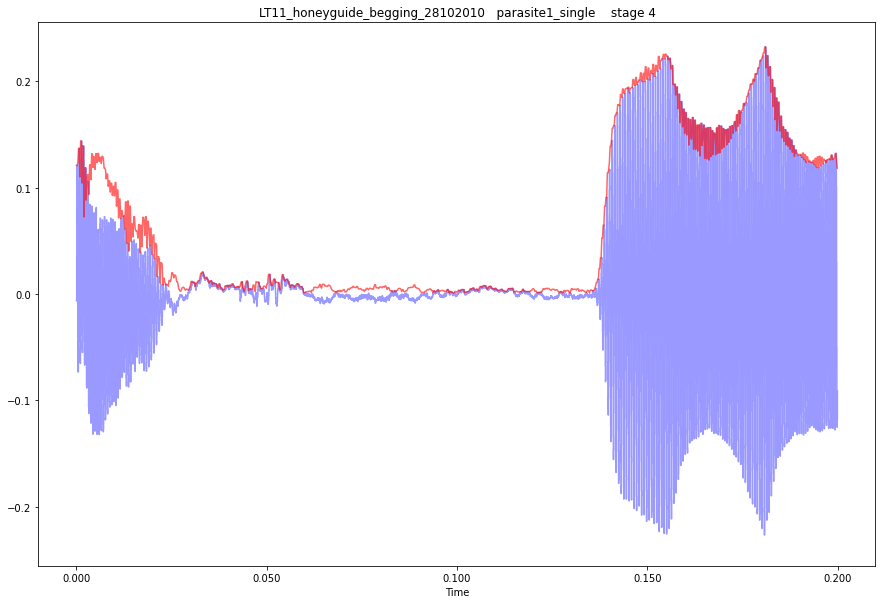

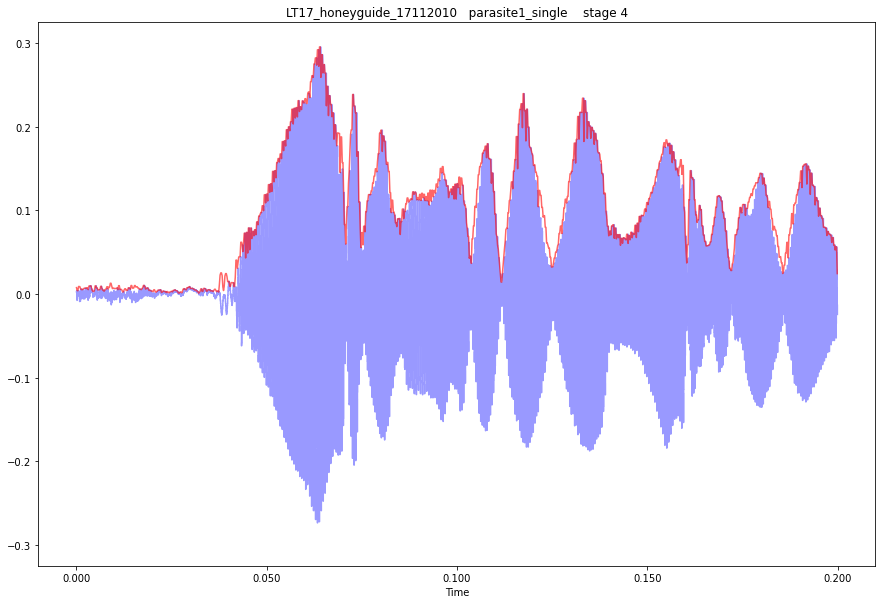

In [25]:
frame_size = 8
hop_length = 4

start_t = 10
end_t = 10.2


signal_start=int(np.ceil(start_t*sr))
signal_end=int(np.ceil(end_t*sr))


for file in df['file_name']:
  call_type = df.loc[df['file_name'] == file, 'type'].item()
  stage = df.loc[df['file_name'] == file, 'chick stage'].item()
  audio = os.path.join(data_root_dir, call_type, file + '.wav')
  signal, sr = librosa.load(audio)

  amp_env = amplitude_envelope(signal[signal_start:signal_end],frame_size,hop_length)
  n_frames=range(amp_env.size)
  time=librosa.frames_to_time(n_frames,hop_length=hop_length) #+ hop_length/(sr)

  plt.figure(figsize=(15, 10))
  librosa.display.waveshow(signal[signal_start:signal_end], sr=sr, alpha=0.4, color='b')

  plt.plot(time,amp_env,color='r',alpha=0.6)
  plt.title(file + '   ' + call_type + '    ' + str(stage))
  plt.show()
  print('\n')

#### using existing Hilbert analytic signal implementation 

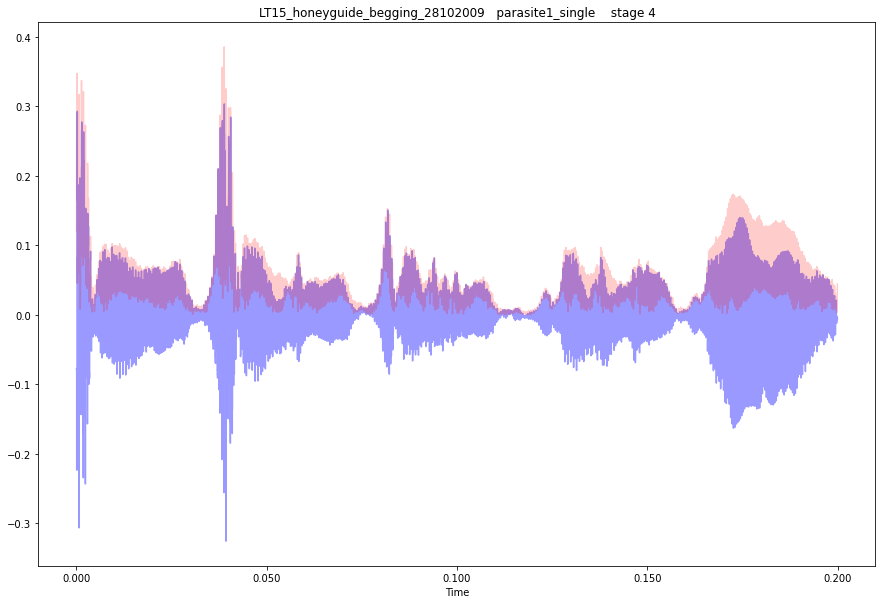

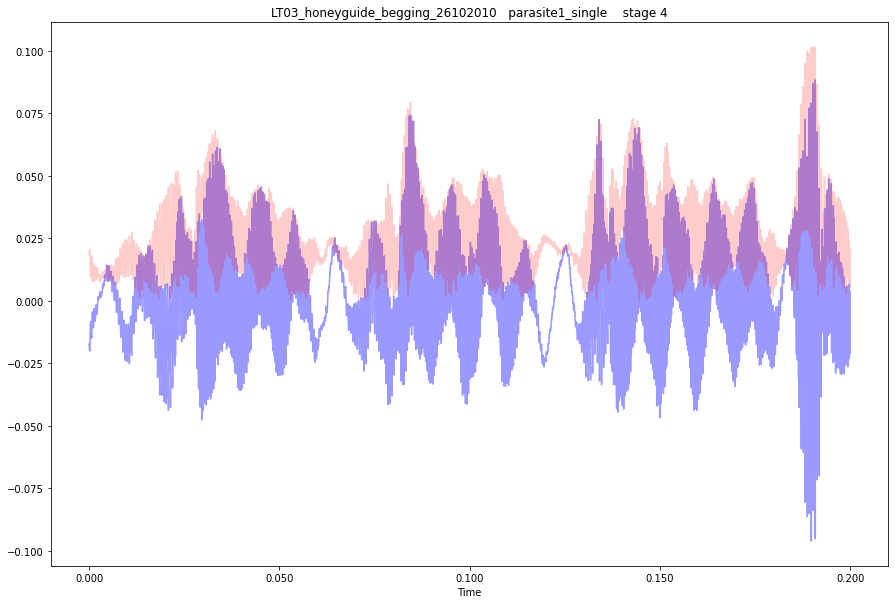

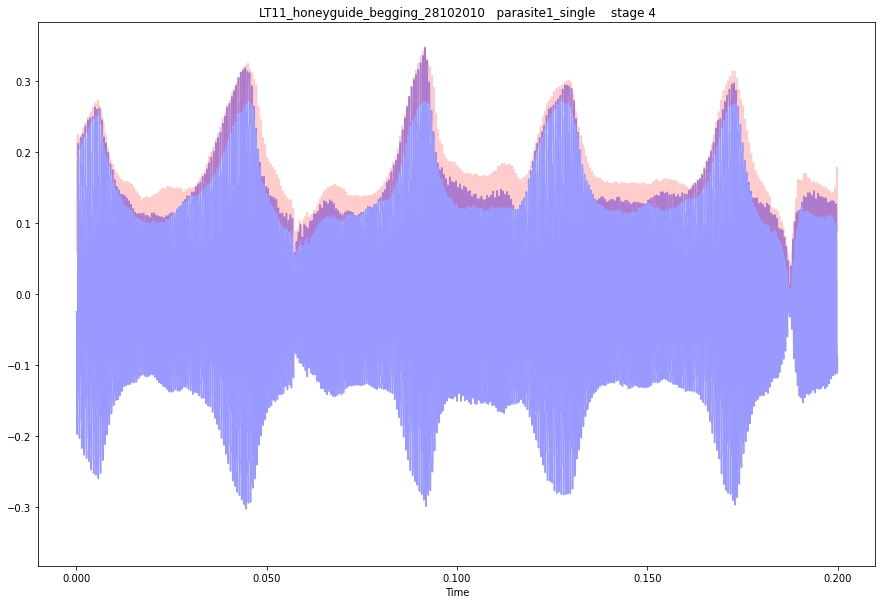

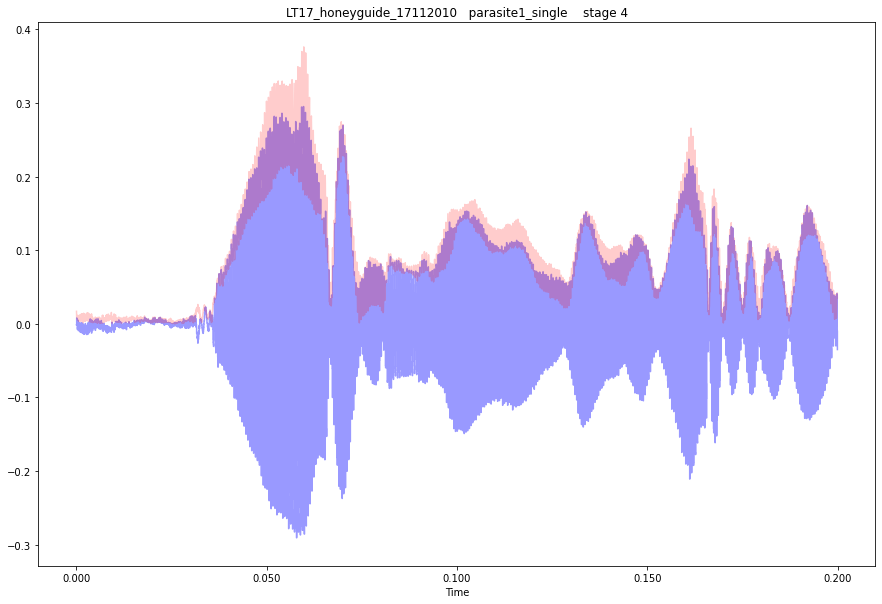

In [16]:


start_t = 12
end_t = 12.2


signal_start=int(np.ceil(start_t*sr))
signal_end=int(np.ceil(end_t*sr))


for file in df['file_name']:
  call_type = df.loc[df['file_name'] == file, 'type'].item()
  stage = df.loc[df['file_name'] == file, 'chick stage'].item()
  audio = os.path.join(data_root_dir, call_type, file + '.wav')
  signal, sr = librosa.load(audio)

  analytic_signal = hilbert(signal[signal_start:signal_end])
  amplitude_envelope = np.abs(analytic_signal)
  time = np.arange(len(amplitude_envelope))/sr

  plt.figure(figsize=(15, 10))
  librosa.display.waveshow(signal[signal_start:signal_end], sr=sr, alpha=0.4, color='b')

  plt.plot(time,amplitude_envelope,color='r',alpha=0.2)
  plt.title(file + '   ' + call_type + '    ' + str(stage))
  plt.show()
  
  print('\n')

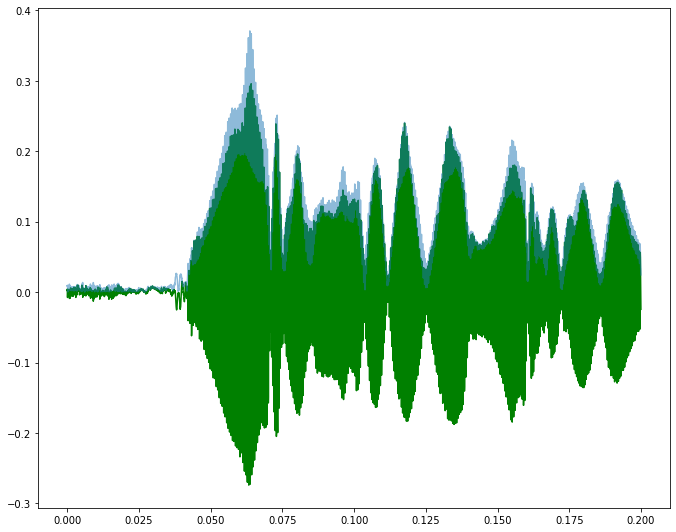

In [ ]:

plt.plot(time,signal[signal_start:signal_end],color='g')
plt.plot(time,np.abs(hilbert(signal[signal_start:signal_end])),alpha=0.5)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


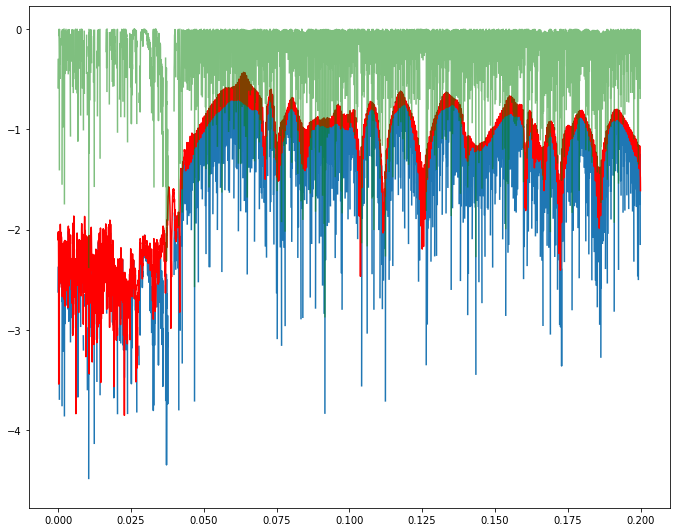

In [ ]:
aelog = np.log10(np.abs(hilbert(signal[signal_start:signal_end])))
siglog = np.log10(signal[signal_start:signal_end])

plt.plot(time,siglog)
plt.plot(time,aelog,color='r')
plt.plot(time,siglog-aelog,color='g',alpha=0.5)

In [ ]:
window = 10

roll_mean = pd.Series(amplitude_envelope).rolling(window,center=True,min_periods=1).mean()
roll_var = pd.Series(amplitude_envelope).rolling(window,min_periods=1).std()


In [ ]:
up = roll_mean + roll_var
down = roll_mean - roll_var

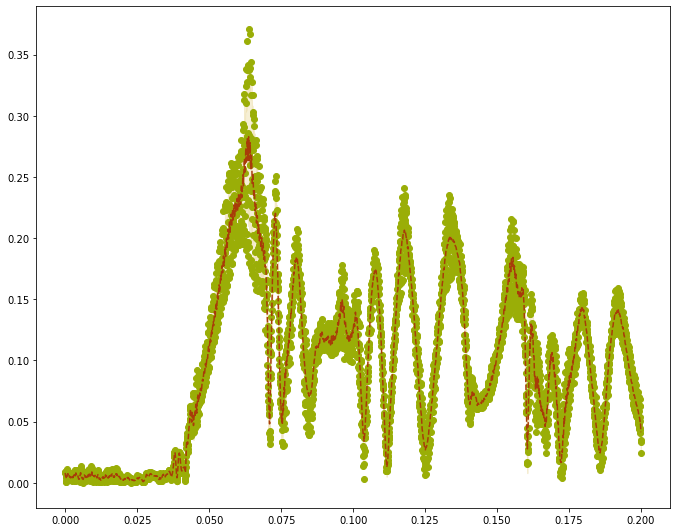

In [ ]:
plt.rcParams["figure.figsize"] = [9.50, 7.50]
plt.rcParams["figure.autolayout"] = True


fig, axes = plt.subplots(1,1)

axes.plot(time,amplitude_envelope,'o',c='xkcd:puke green',label='Rz val.')
axes.plot(time,roll_mean,'--',linewidth=1.5,c='xkcd:rust',label='Rz val. rolling mean')
axes.fill_between(time, up, down, alpha=0.3,color='xkcd:sand',edgecolor='k',label='conf. interval')

plt.show()

### separate harmonic and percusive components

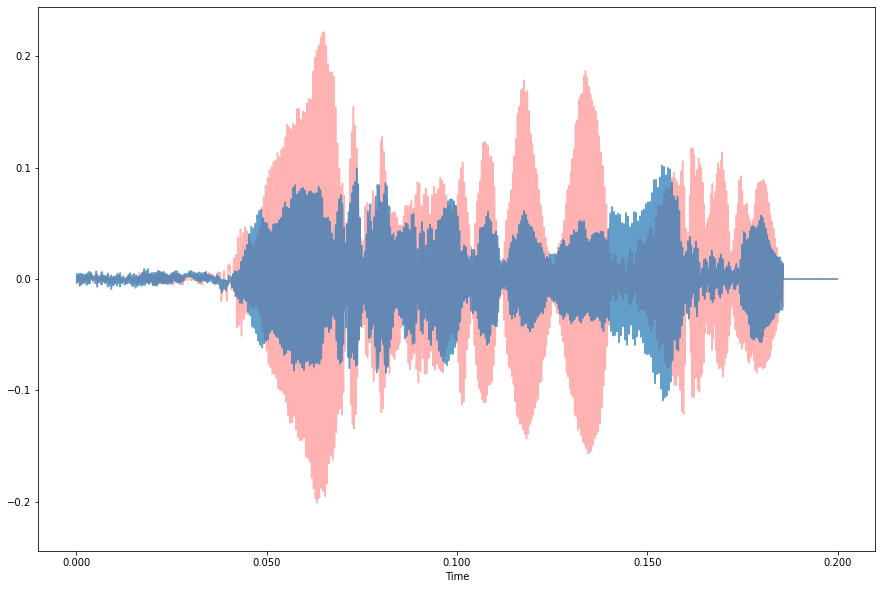

In [ ]:
#fig, ax = plt.subplots(nrows=3, sharex=True)
plt.figure(figsize=(15, 10))
y_harm, y_perc = librosa.effects.hpss(signal[signal_start:signal_end])
librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.3, label='Percussive')
librosa.display.waveshow(y_harm, sr=sr, alpha=0.7,  label='Harmonic')
plt.show()
#ax[2].set(title='Multiple waveforms')
#ax[2].legend()

### Modulation spectrogram

In [29]:
df = df_parasite1_single[df_parasite1_single['chick stage']=='stage 4']

**For Parasites Group1 / Stage 4**

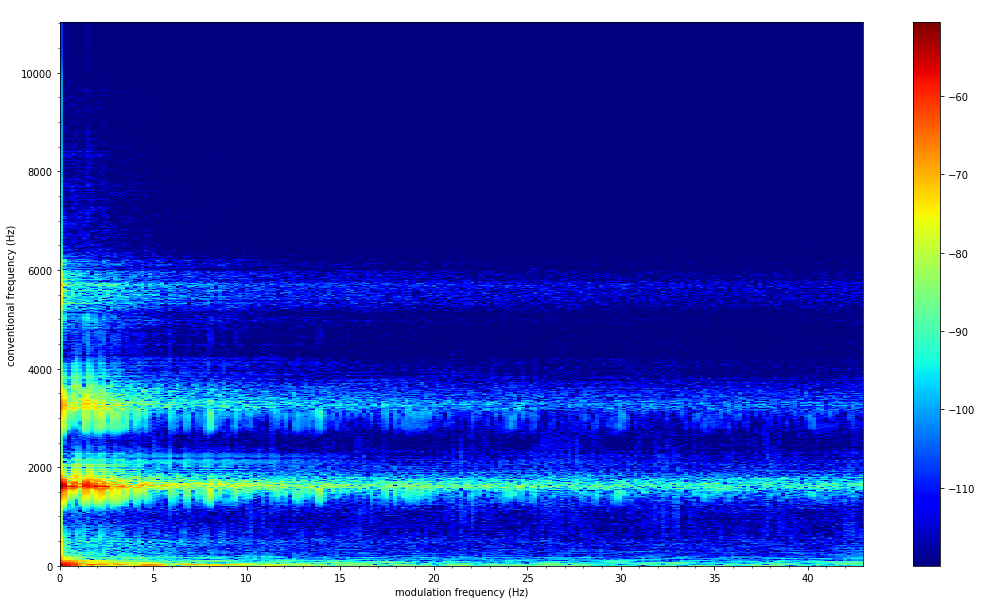

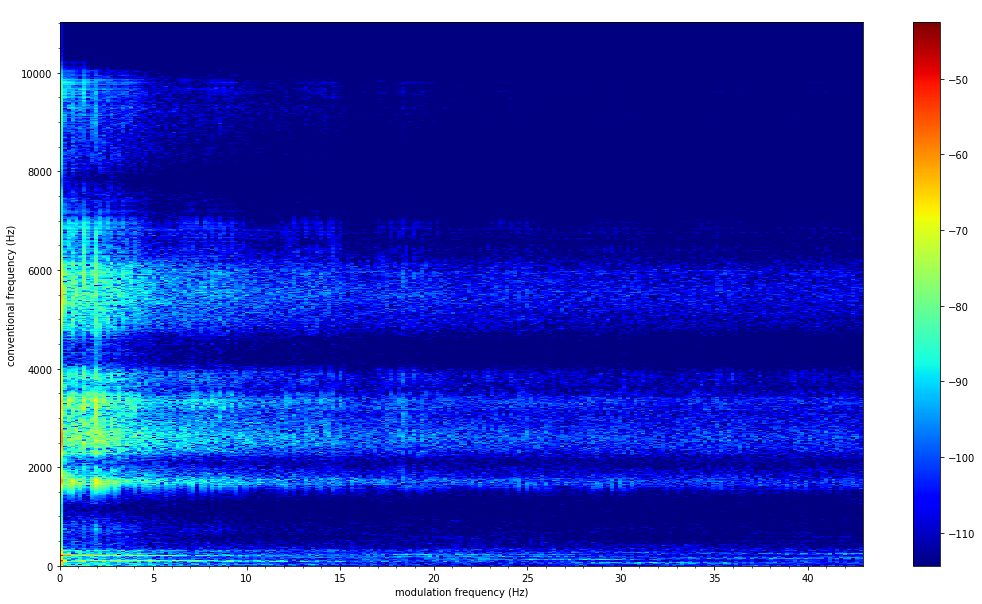

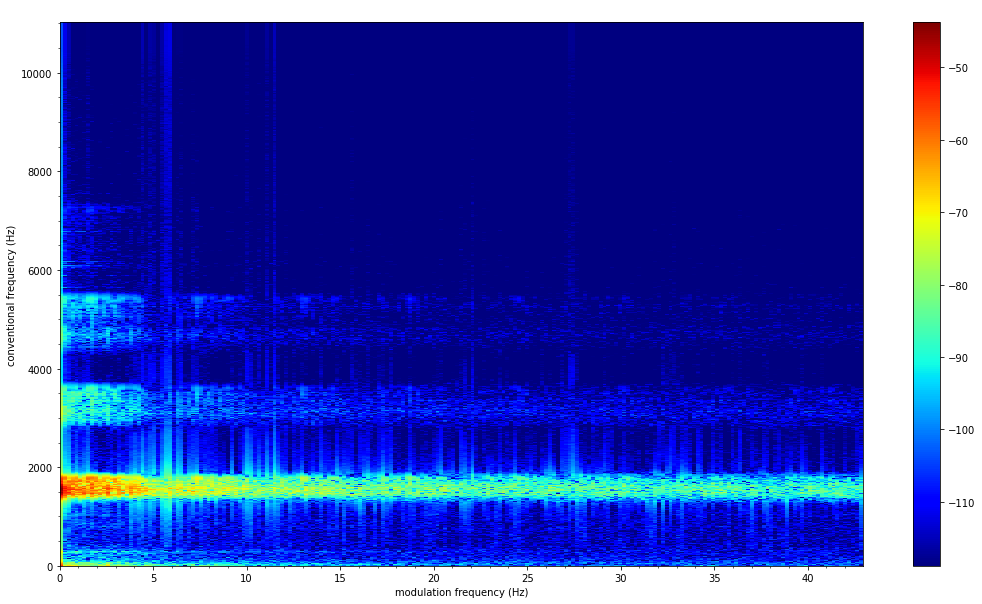

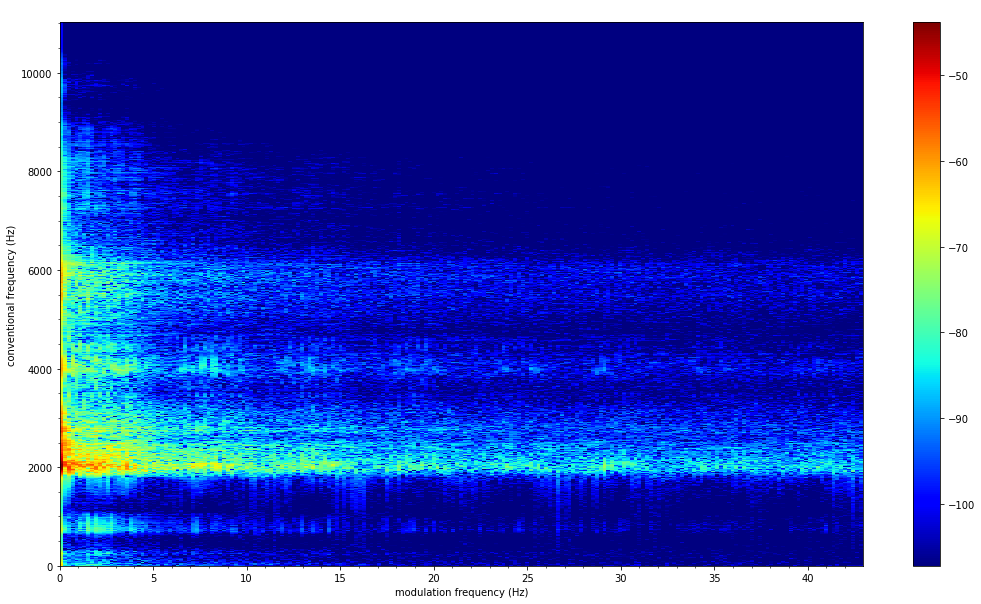

In [47]:
df = df_parasite1_single[df_parasite1_single['chick stage']=='stage 4']


w_size = 4096
w_shift = 1 / 16 * w_size

start_t = 0
signal_duration = 5

for file in df['file_name']:
    signal, sr, stage, call_type = load_signal(df, file, start_t, signal_duration)
    rfft_mod = ama.strfft_modulation_spectrogram(signal,
                                             sr,
                                             w_size,
                                             w_shift,
                                             channel_names=' ',
                                             win_function_y='boxcar',
                                             win_function_x='boxcar')
    plt.figure(figsize=(18, 10))
    ama.plot_modulation_spectrogram_data(rfft_mod, c_map='jet')#,modf_range=[1,40])
    plt.plot()

**For Host Brood Group 1 / Stage 4**

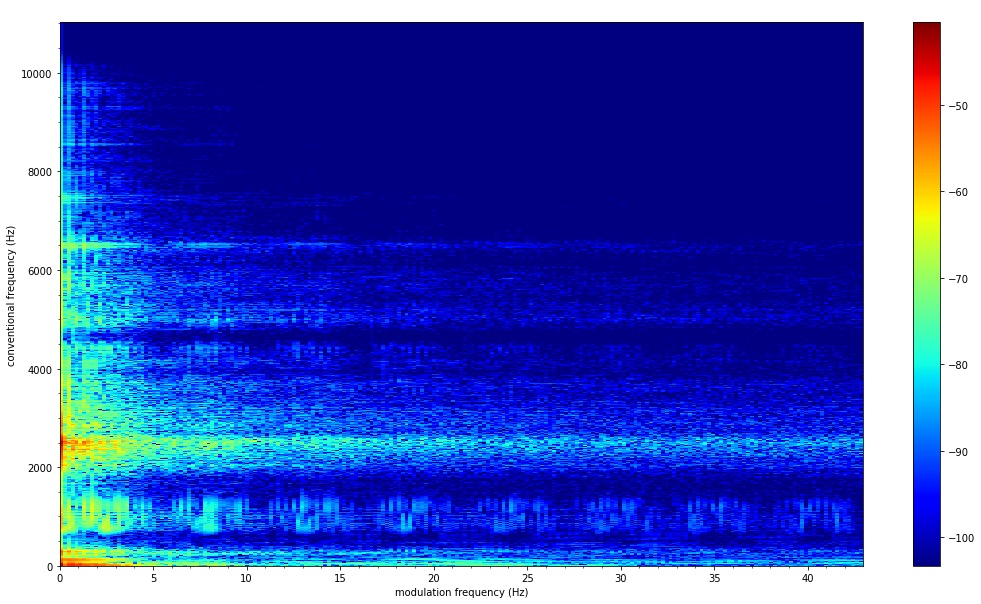

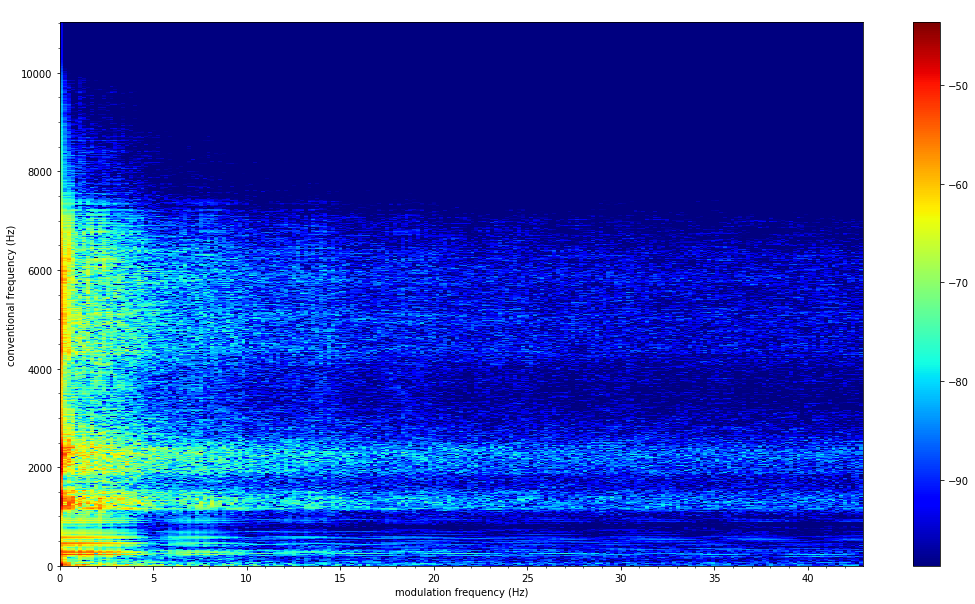

In [55]:
df = df_host1_brood[df_host1_brood['chick stage']=='stage 4']

w_size = 4096
w_shift = 1 / 16 * w_size

start_t = 0
signal_duration = 5

for file in df['file_name']:
    signal, sr, stage, call_type = load_signal(df, file, start_t, signal_duration)
    rfft_mod = ama.strfft_modulation_spectrogram(signal,
                                             sr,
                                             w_size,
                                             w_shift,
                                             channel_names=' ',
                                             win_function_y='boxcar',
                                             win_function_x='boxcar')
    plt.figure(figsize=(18, 10))
    ama.plot_modulation_spectrogram_data(rfft_mod, c_map='jet')#,modf_range=[1,40])
    plt.plot()

**For parasite Group 2 / stage 3**

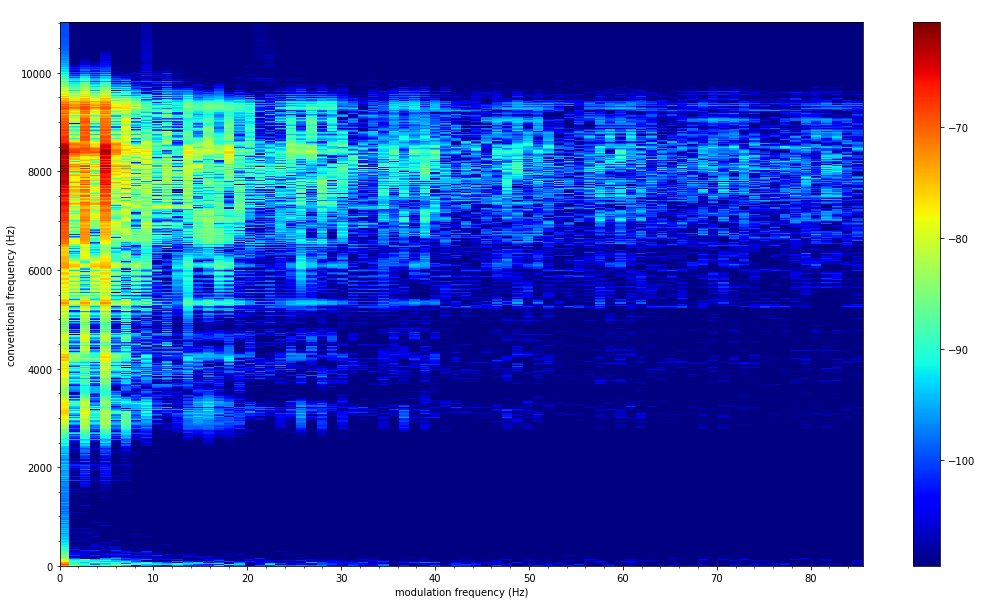

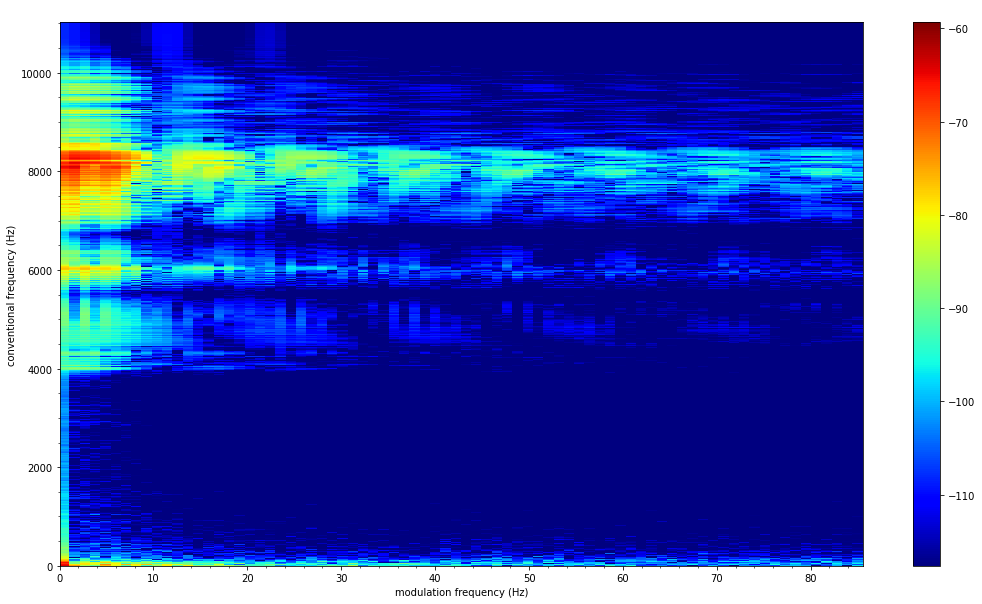

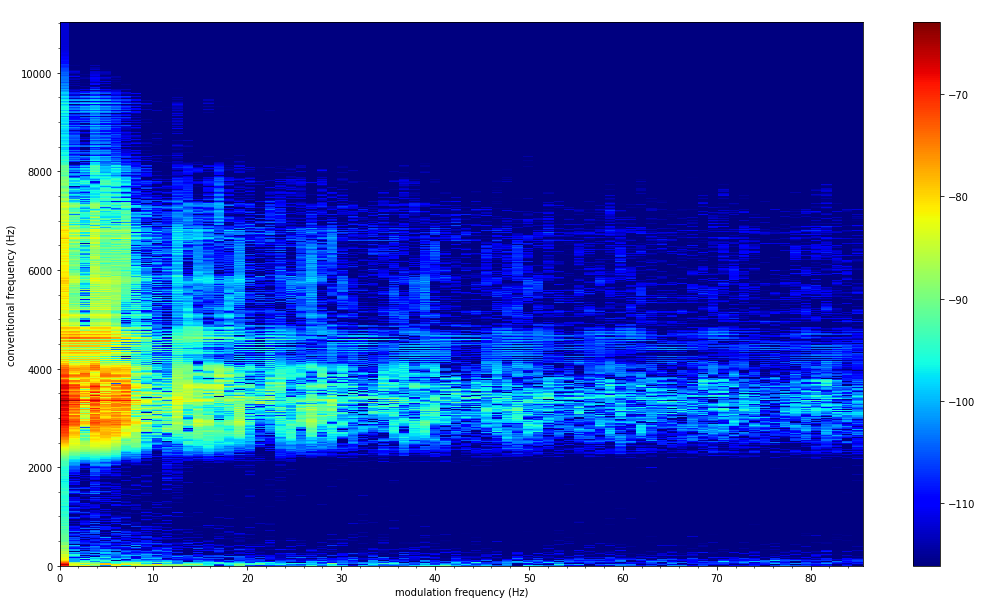

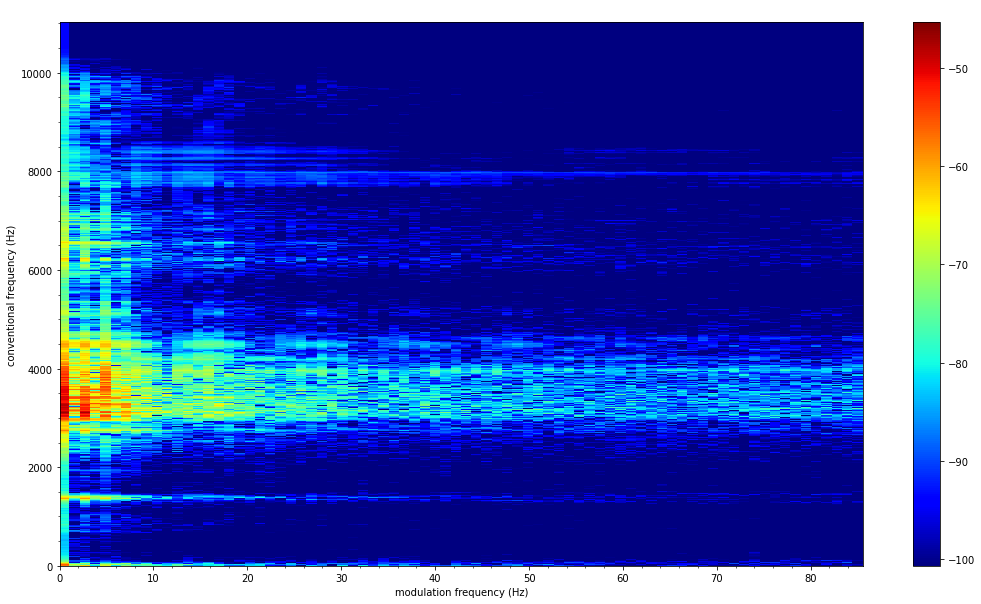

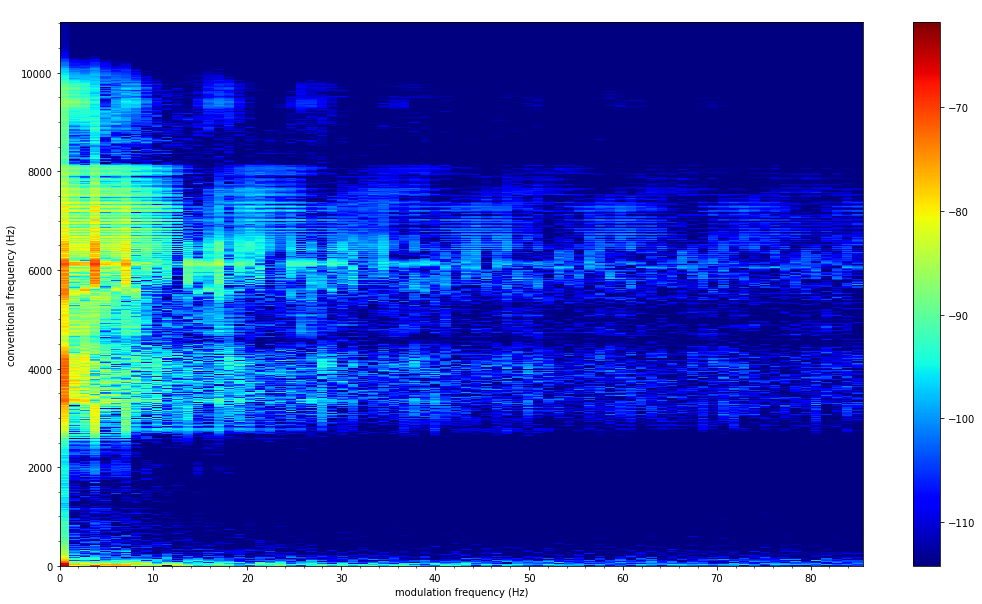

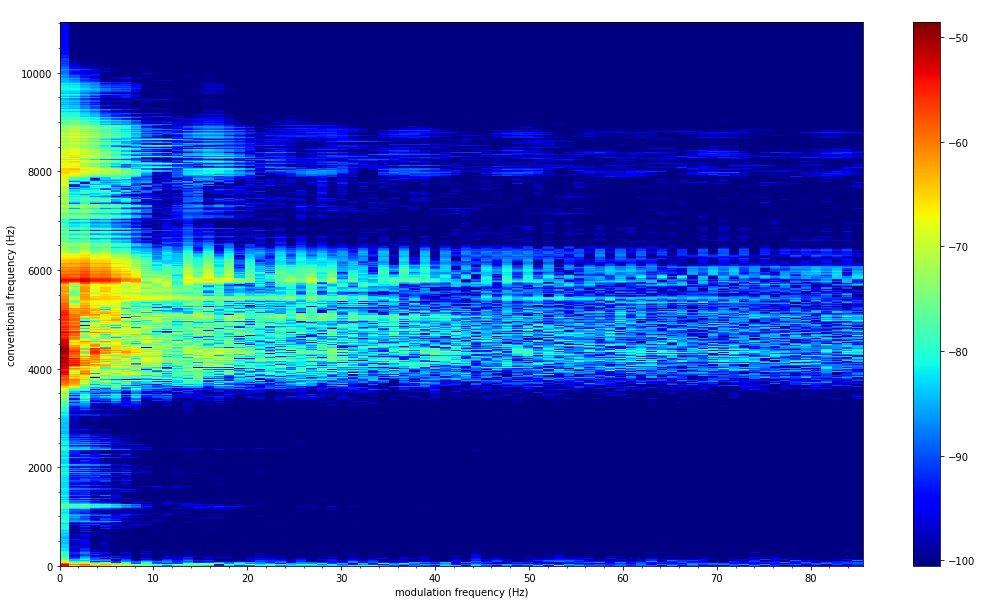

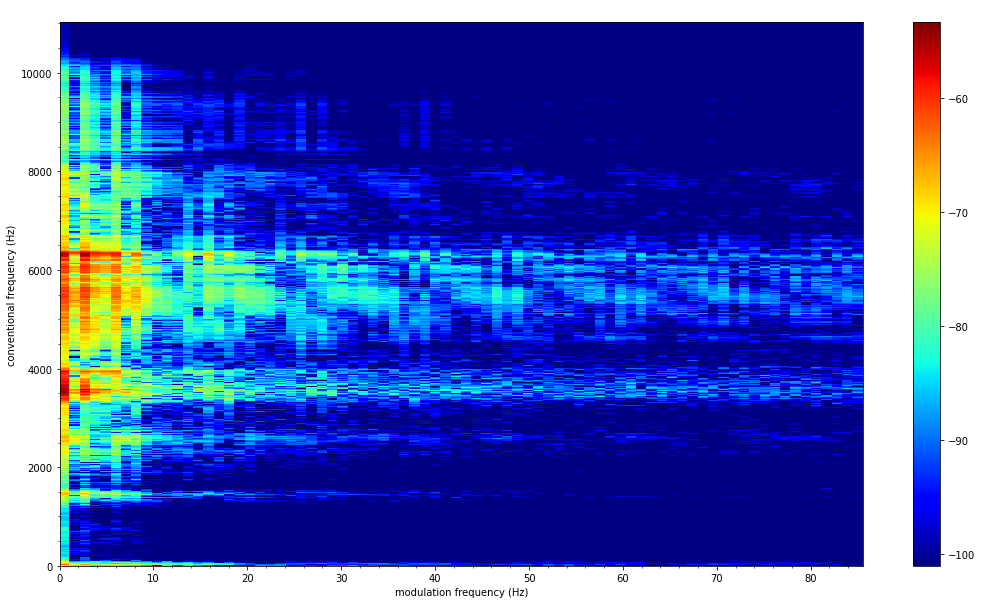

In [179]:
df = df_parasite2_single[df_parasite2_single['chick stage']=='stage 3']

w_size = 2048
w_shift = 1 / 16 * w_size

start_t = 5
signal_duration = 1

for file in df['file_name']:
    signal, sr, stage, call_type = load_signal(df, file, start_t, signal_duration)
    rfft_mod = ama.strfft_modulation_spectrogram(signal,
                                             sr,
                                             w_size,
                                             w_shift,
                                             channel_names=' ',
                                             win_function_y='boxcar',
                                             win_function_x='boxcar')
    plt.figure(figsize=(18, 10))
    ama.plot_modulation_spectrogram_data(rfft_mod, c_map='jet')#,modf_range=[1,40])
    plt.plot()

**For Host Single Group 2 / Stage 3**

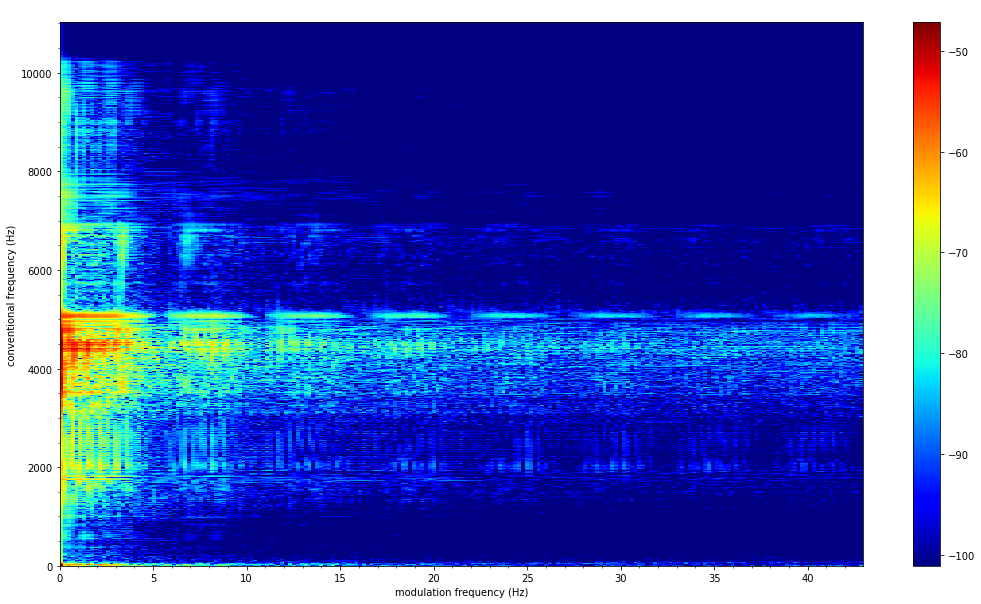

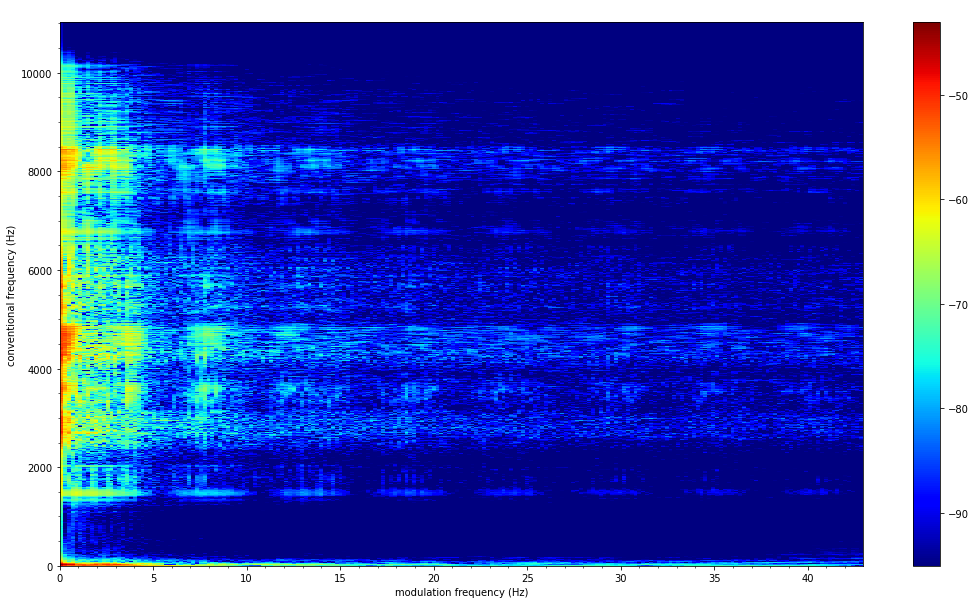

In [69]:
df = df_host2_single[df_host2_single['chick stage']=='stage 3']

w_size = 4096
w_shift = 1 / 16 * w_size

start_t = 0
signal_duration = 5

for file in df['file_name']:
    signal, sr, stage, call_type = load_signal(df, file, start_t, signal_duration)
    rfft_mod = ama.strfft_modulation_spectrogram(signal,
                                             sr,
                                             w_size,
                                             w_shift,
                                             channel_names=' ',
                                             win_function_y='boxcar',
                                             win_function_x='boxcar')
    plt.figure(figsize=(18, 10))
    ama.plot_modulation_spectrogram_data(rfft_mod, c_map='jet')#,modf_range=[1,40])
    plt.plot()

**For Host Brood Group 2 / Stage 3**

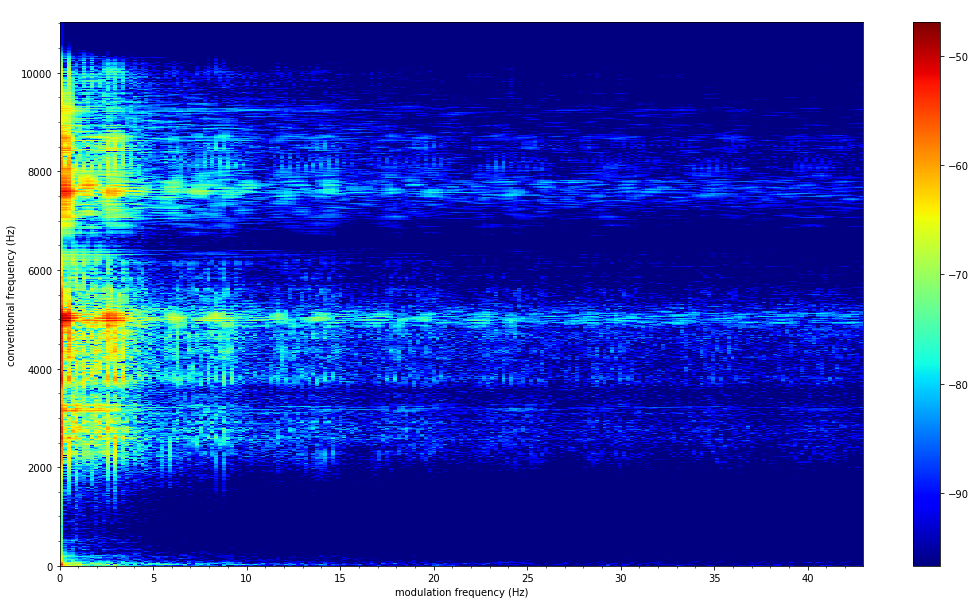

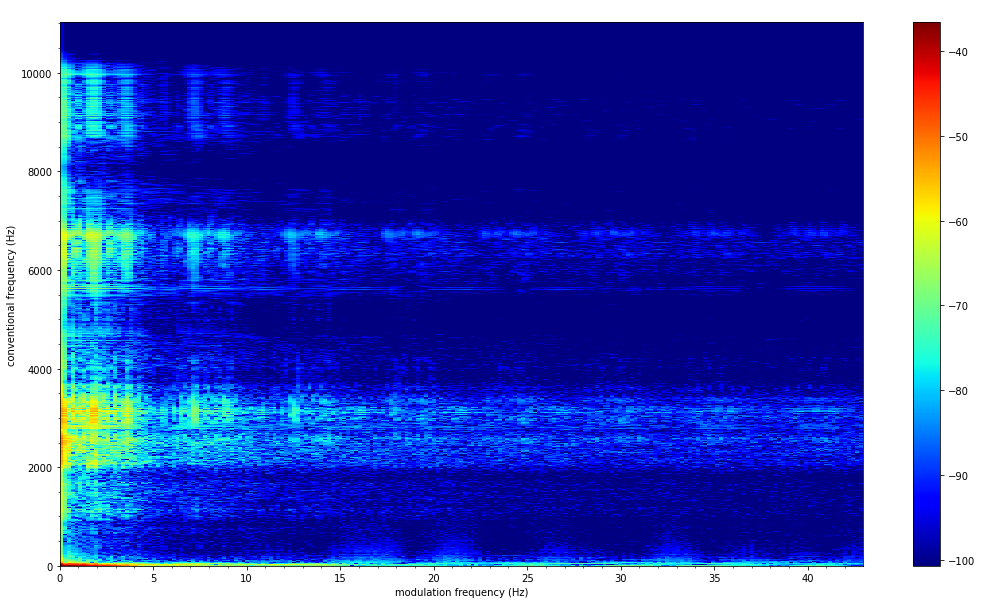

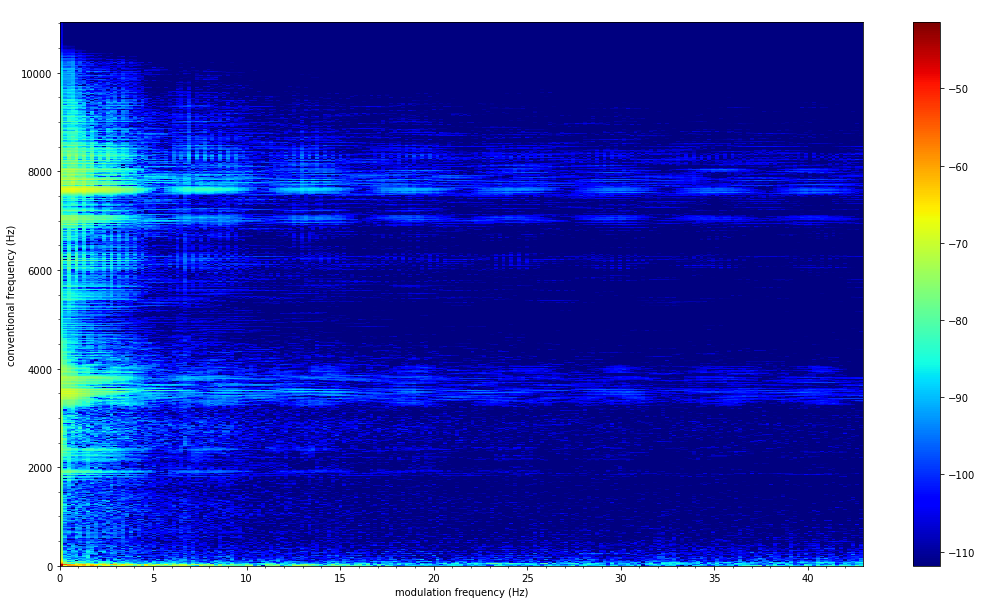

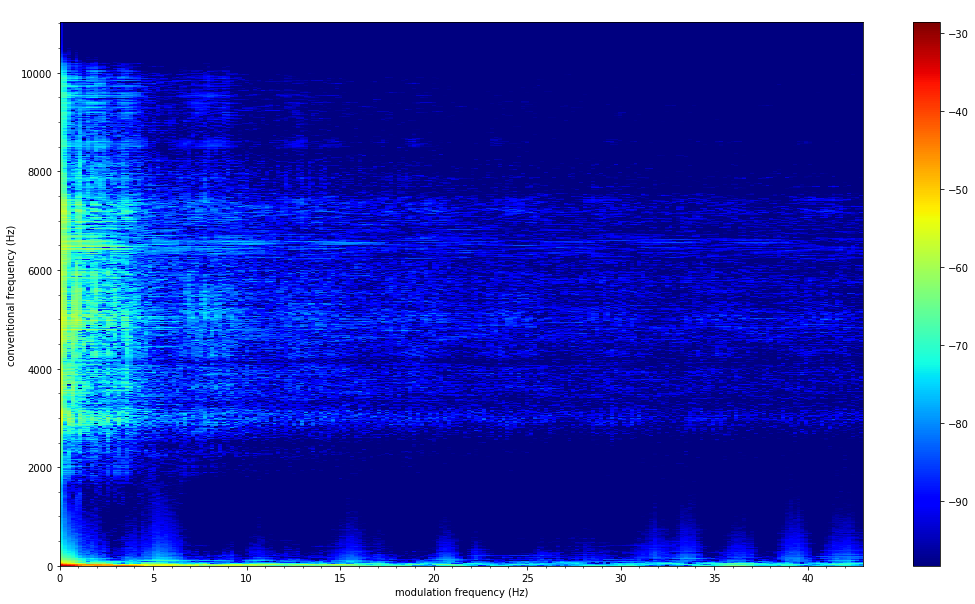

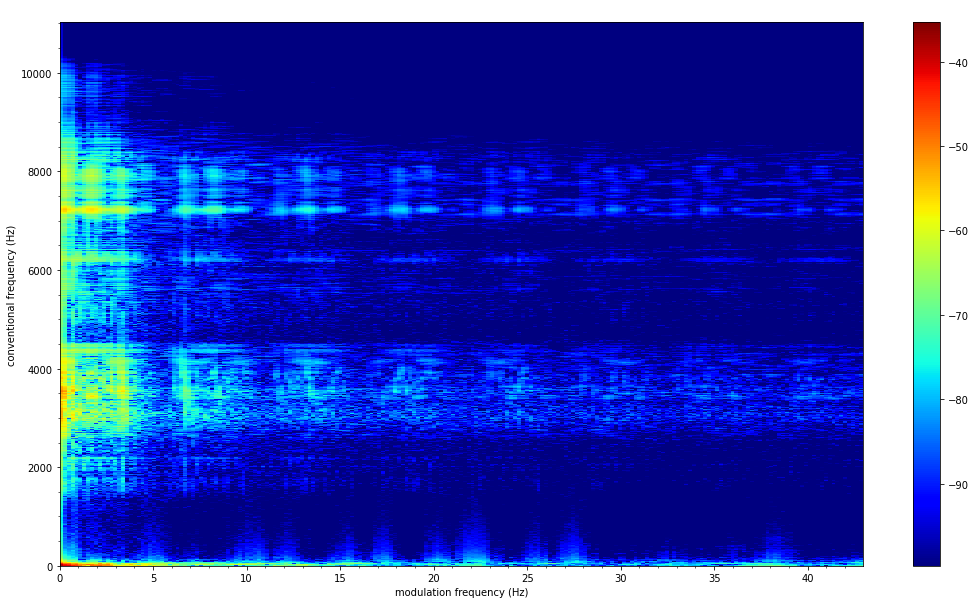

In [192]:
df = df_host2_brood[df_host2_brood['chick stage']=='stage 3']

w_size = 4096
w_shift = 1 / 16 * w_size

start_t = 0
signal_duration = 5

for file in df['file_name']:
    signal, sr, stage, call_type = load_signal(df, file, start_t, signal_duration)
    rfft_mod = ama.strfft_modulation_spectrogram(signal,
                                             sr,
                                             w_size,
                                             w_shift,
                                             channel_names=' ',
                                             win_function_y='boxcar',
                                             win_function_x='boxcar')
    plt.figure(figsize=(18, 10))
    ama.plot_modulation_spectrogram_data(rfft_mod, c_map='jet')#,modf_range=[1,40])
    plt.plot()

#### re-creating some parts from the AMA package

In [110]:
#rfft_mod['power_modulation_spectrogram']
max(rfft_mod['rFFT_modulation_spectrogram'][2048])
#max(rfft_mod['freq_mod_axis'])

array([0.00107983+0.j])

In [117]:
modf_ax = rfft_mod['freq_mod_axis']
f_ax = rfft_mod['freq_axis']
X_pwr = rfft_mod['power_modulation_spectrogram']

MF, F = np.meshgrid(modf_ax, f_ax) 

X_plot = 10 * np.log10(X_pwr[:,:] + np.finfo(float).eps) 

pmesh = plt.pcolormesh(MF, F, X_plot, cmap = 'jet')

plt.draw()

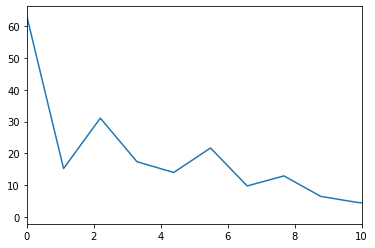

In [190]:
Y_pwr = np.abs(rfft_mod['rFFT_modulation_spectrogram'])
Y = np.sum(Y_pwr,axis=0)
X = rfft_mod['freq_mod_axis']

plt.plot(X,Y)
plt.xlim(0,10)

plt.show()

### Cepstra


In [ ]:
def amplitude_envelope(signal, frame_size, hop_length):
    amp_env = np.array([
        max(signal[i:i + frame_size])
        for i in range(0, len(signal), hop_length)
    ])
    return amp_env


def logspec(signal, sr):
    logfft = np.log10(np.abs(scipy.fft.fft(signal)))  # get the log of the |fft|.
    freqs = np.linspace(0, sr, len(logfft))
    return logfft, freqs


def ae_logspec(logfft, freqs, sr, frame_size=2048, hop_size=2048):
    ae_logfft = amplitude_envelope(
        logfft[0:int(len(freqs) / 2)],
        frame_size=frame_size,
        hop_length=hop_size)  # get the amplitude envelope of the logfft
    ae_freqs = np.linspace(0, sr / 2, len(ae_logfft))
    return ae_logfft, ae_freqs


def smooth_ae(ae, ae_freqs, sr, smooth_factor=2):
    f1 = scipy.interpolate.UnivariateSpline(ae_freqs, ae, s=smooth_factor)
    new_ae_freqs = np.linspace(0, sr / 2, 4 * len(ae))
    return new_ae_freqs, f1(new_ae_freqs)


def plot_logspec(logspec,
                 sr,
                 frame_size,
                 hop_size,
                 label,
                 call_type,
                 smoothing=2,
                 compare_stages=False,
                 plot_spec=False,
                 plot_ae=False,
                 plot_smooth_ae=True):
    #plt.figure(figsize=(18,8))
    #for signal,srate in zip(logspec,sr):
    logfft = logspec[0]
    freqs = logspec[1]
    if compare_stages == False:
        if np.isin(call_type, ['host1_brood', 'host2_brood']):
            line = 'solid'
            color = 'k'
            lab = 'host brood'
        elif np.isin(call_type, ['host1_single', 'host2_single']):
            line = 'dashed'
            color = 'r'
            lab = 'host single'
        elif np.isin(call_type, ['parasite1_single', 'parasite2_single']):
            line = 'dotted'
            color = 'b'
            lab = 'parasite'
    elif compare_stages == True:
        line = 'solid'
        if label == 'stage 0':
            color = 'k'
            lab = 'stage 0'
        elif label == 'stage 1':
            color = 'b'
            lab = 'stage 1'
        elif label == 'stage 2':
            color = 'g'
            lab = 'stage 2'
        elif label == 'stage 3':
            color = 'y'
            lab = 'stage 3'
        elif label == 'stage 4':
            color = 'cyan'
            lab = 'stage 4'
        elif label == 'unknown':
            color = 'r'
            lab = 'unknown'
    if plot_spec:
        plt.plot(freqs[0:int(len(freqs) / 2)],
                 logfft[0:int(len(freqs) / 2)],
                 label=lab,
                 linestyle=line,
                 c=color)
    if plot_ae:
        ae = ae_logspec(logfft, freqs, sr, frame_size, hop_size)
        plt.plot(ae[1], ae[0], label=lab, linestyle=line, c=color)
    if plot_smooth_ae:
        ae = ae_logspec(logfft, freqs, sr, frame_size, hop_size)
        smooth = smooth_ae(ae[0], ae[1], sr=sr, smooth_factor=smoothing)
        plt.plot(smooth[0],
                 smooth[1],
                 lw=2,
                 label=lab,
                 linestyle=line,
                 c=color)
    plt.legend()
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude (dB)")
    #plt.show()

    return

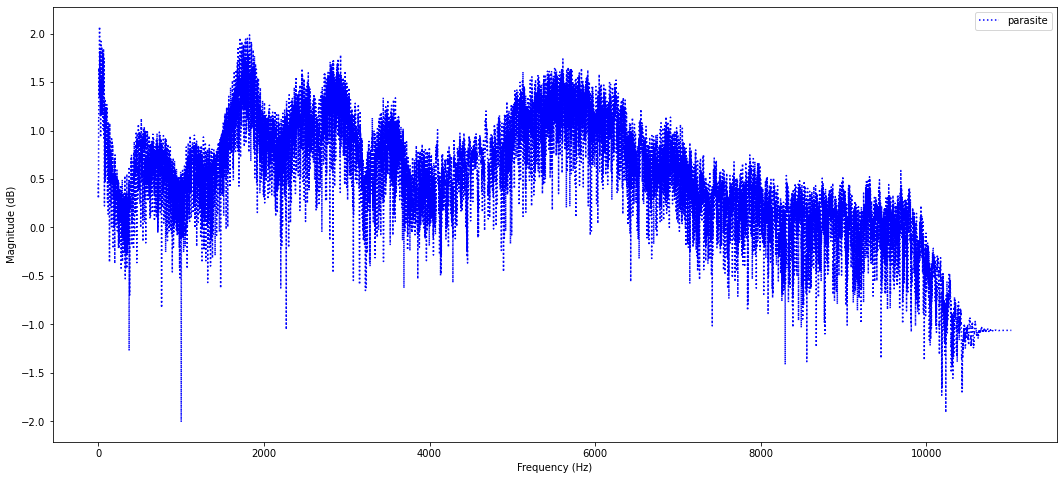

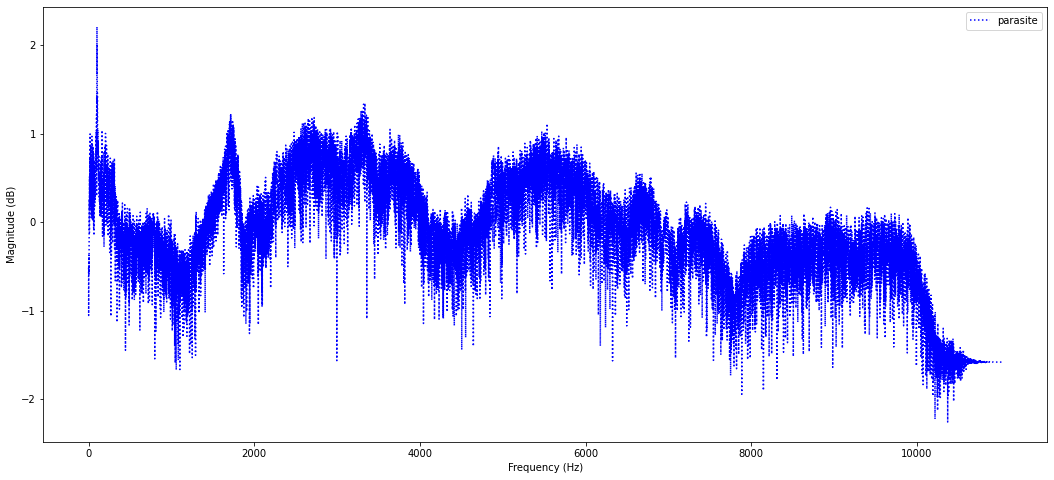

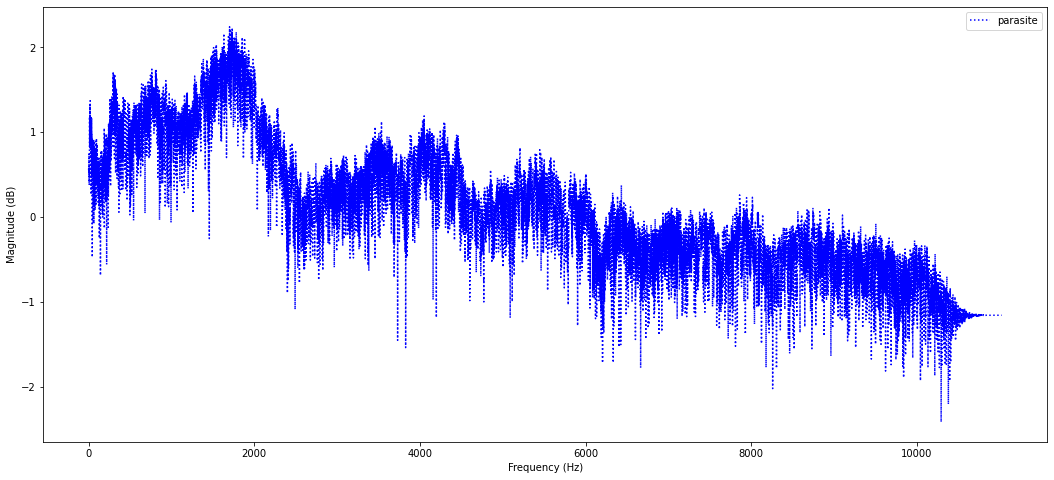

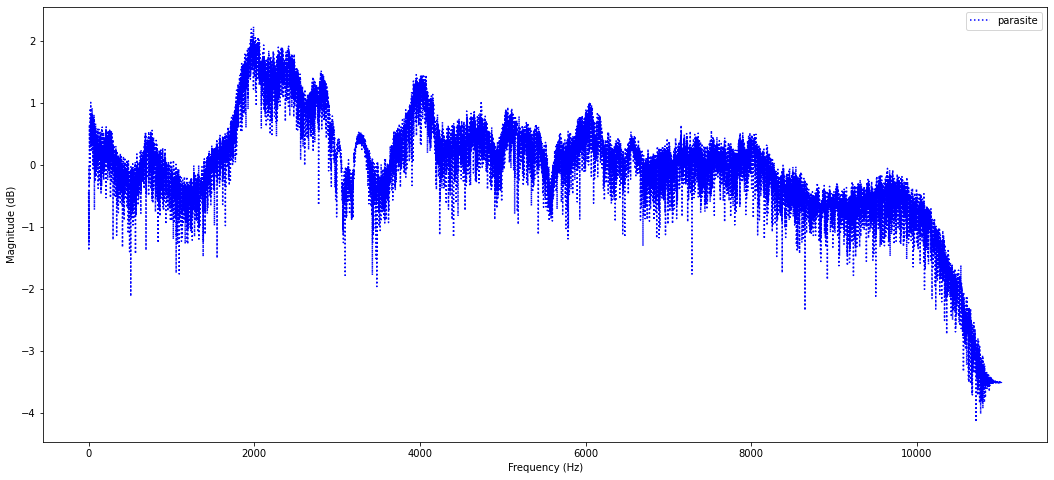

In [ ]:
start_t = 10
t_clip = 1
frame_size = 4096
hop_length = 4096

for file in df['file_name']:
    signal, sr, stage, call_type = load_signal(df,
                                               file,
                                               start_t,
                                               t_clip)
                                            
    logspectrum = logspec(signal, sr)
    plt.figure(figsize=(18, 8))

    plot_logspec(logspectrum,
                 sr,
                 8192,
                 8192,
                 label=stage,
                 call_type=call_type,
                 smoothing=2,
                 compare_stages=False,
                 plot_spec=True,
                 plot_ae=False,
                 plot_smooth_ae=False)

legend_without_duplicate_labels(plt)
plt.show()

Plot IDFT of logspectrum

In [ ]:
start_t = 3
t_clip = 1
frame_size = 1024
hop_length = 512

for file in df['file_name']:
    signal, sr, stage, call_type = load_signal(df,
                                               file,
                                               start_t,
                                               t_clip)
    logspectrum = logspec(signal,sr)
    idft = scipy.fft.ifft(logspectrum)



In [ ]:
idft


array([[ 1.79189102e+00-0.00000000e+00j, -3.64328674e-02+3.38668373e-18j,
        -6.93347864e-01+1.21822431e-17j, ...,
         3.18536111e-01+4.95295415e-17j, -6.93347864e-01-1.21822431e-17j,
        -3.64328674e-02-3.38668373e-18j],
       [ 1.10250000e+04-0.00000000e+00j, -5.00022677e-01-3.50952563e+03j,
        -5.00022677e-01-1.75476278e+03j, ...,
        -5.00022677e-01+1.16984181e+03j, -5.00022677e-01+1.75476278e+03j,
        -5.00022677e-01+3.50952563e+03j]])

In [ ]:
plt.plot(np.abs(idft))

In [ ]:
len(np.abs(idft))

2

### Using matplotlib to plot spectra

In [ ]:
for file in df['file_name']:
    signal, sr, stage, call_type = load_signal(df,
                                               file,
                                               start_t,
                                               t_clip)
    plt.figure(figsize=(18, 8))
    plt.magnitude_spectrum(signal,sr,scale='dB')
plt.show()    

### Some tests with librosa

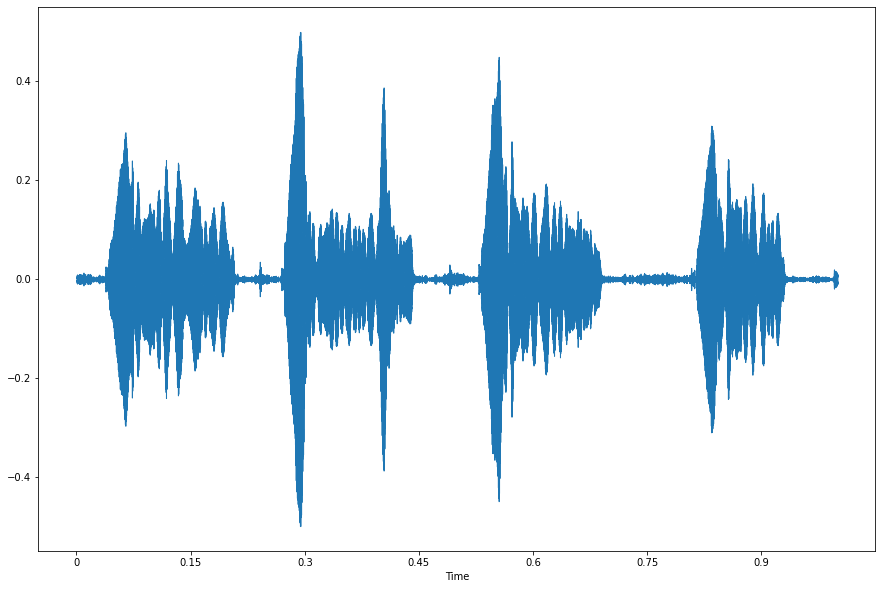

In [ ]:
plt.figure(figsize=(15, 10))
librosa.display.waveshow(signal,sr)
plt.show()

In [ ]:
stft=librosa.stft(y=signal,n_fft=2048,window='hann',hop_length=2048)